# Wrist Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

In [8]:
def difference(dataset, interval=1):
	diff = []
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

In [9]:
def norm(df):
    scaler = StandardScaler(with_mean=True,
                            with_std=True,
                            copy=False).fit(df)
    df = scaler.transform(df)
    return df

In [41]:
def angles_plot(df,angle_name,window=1000):
    
    angle_thresh = 0.001
    
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    labels = [0]*window
    angles = np.array(df[angle_name+'_Angle'])
    
    for i in range(df.shape[0]-window):
        j = i + window
        loc_angles = angles[j-window:j]
        diff = difference(loc_angles).mean()
        if(abs(diff)<angle_thresh):
            labels.append(0)
        elif(diff>0):
            labels.append(1)
        else:
            labels.append(2)
            
    i = 0
    counter = [0,0,0]
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            counter[0]=counter[0]+1
            face = '1'
        if lb==1:
            counter[1]=counter[1]+1
            face='r'
        if lb==2:
            counter[2]=counter[2]+1
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.5)
        i = i+1
   
    y = np.linspace(0,df.shape[0],df.shape[0])
    plt.plot(y,angles, linewidth=2, markersize=12)
    plt.title(angle_name+' Classifications')
    
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('Angle (deg)')    
    plt.show()
    for i in range(3):
        print(i,'->',counter[i]*100/df.shape[0],'%')

In [61]:
def angles_plot_DTM(df,window=1000):
    
    angle_thresh = 0.008
    
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    labels = [0]*window
    angles_flexion = np.array(df['Flexion_Angle'])
    angles_radial = np.array(df['Radial_Angle'])
    
    for i in range(df.shape[0]-window):
        j = i + window
        loc_flexion = angles_flexion[j-window:j]
        loc_radial = angles_radial[j-window:j]
        
        diff_flexion = difference(loc_flexion).mean()
        diff_radial = difference(loc_radial).mean()
        
        if(abs(diff_flexion)<angle_thresh and abs(diff_radial)<angle_thresh):
            labels.append(0)
        elif(diff_flexion>0 and diff_radial>0):
            labels.append(1)
        else:
            labels.append(2)
            
    i = 0
    counter = [0,0,0]
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            counter[0]=counter[0]+1
            face = '1'
        if lb==1:
            counter[1]=counter[1]+1
            face='r'
        if lb==2:
            counter[2]=counter[2]+1
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.5)
        i = i+1
   
    y = np.linspace(0,df.shape[0],df.shape[0])
    plt.plot(y,angles_flexion, linewidth=2, markersize=12,label='Extension/Flexion Angle')
    plt.plot(y,angles_radial, linewidth=2, markersize=12,label='Ulnar/Radial Angle')
    plt.title('DTM Classifications')
    
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('Angle (deg)')    
    plt.show()
    for i in range(3):
        print(i,'->',counter[i]*100/df.shape[0],'%')

In [72]:
def emg_label_plot(df,window,typ=1):
    labels = [0]*window
    plt.figure(figsize=(20,8))
    plt.grid()
    plt.axis('on')
    
    if typ==1:
        angle_thresh = 0.008
        angles_flexion = np.array(df['Flexion_Angle'])
        angles_radial = np.array(df['Radial_Angle'])
        for i in range(df.shape[0]-window):
            j = i + window
            loc_flexion = angles_flexion[j-window:j]
            loc_radial = angles_radial[j-window:j]

            diff_flexion = difference(loc_flexion).mean()
            diff_radial = difference(loc_radial).mean()

            if(abs(diff_flexion)<angle_thresh and abs(diff_radial)<angle_thresh):
                labels.append(0)
            elif(diff_flexion>0 and diff_radial>0):
                labels.append(1)
            else:
                labels.append(2)
    else:
        angle_thresh = 0.001
        angles = np.array(df['Pronation_Angle'])
        for i in range(df.shape[0]-window):
            j = i + window
            loc_angles = angles[j-window:j]
            diff = difference(loc_angles).mean()
            if(abs(diff)<angle_thresh):
                labels.append(0)
            elif(diff>0):
                labels.append(1)
            else:
                labels.append(2)
                
    emg_labels = ['EMG1', 'EMG2', 'EMG3', 
                  'EMG4', 'EMG5', 'EMG6',
                  'EMG7', 'EMG8', 'EMG9', 
                  'EMG10','EMG11','EMG12']
    y = np.linspace(0,df.shape[0],df.shape[0])    
    for lbs in emg_labels:
        plt.plot(y,df[lbs],linewidth=2, markersize=12,label=lbs)
        
    i = 0
    counter = [0,0,0]
#     for lb in tqdm(labels):
    for lb in labels:
        if lb==0:
            counter[0]=counter[0]+1
            face = '1'
        if lb==1:
            counter[1]=counter[1]+1
            face='r'
        if lb==2:
            counter[2]=counter[2]+1
            face='b'
        plt.axvspan(i, i+1, facecolor=face, alpha=0.2)
        i = i+1
        
    clear_patch = mpatches.Patch(color='white', label='No Motion')
    blue_patch = mpatches.Patch(color='blue', label='Negative Motion(-)')
    red_patch = mpatches.Patch(color='red', label='Positive Motion(+)')
    plt.legend(handles=[clear_patch,red_patch,blue_patch],loc=2)
    
    plt.xlabel('t [2000hz]')
    plt.ylabel('sEMG(V)')    
    plt.show()       

    

In [73]:
def count_labesl(array):
    ln = len(array)
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    for x in array:
        if(x==0):
            sum_0 = sum_0 + 1
        if(x==1):
            sum_1 = sum_0 + 1
        if(x==2):
            sum_2 = sum_0 + 1
    print('Label 0 =',sum_0)
    print('Label 1 =',sum_1)
    print('Label 2 =',sum_2)

In [74]:
def compartive_label_plot(df,window,frames=None,typ=1):
    st = time()
    if frames!=None:
        start,end = frames
        df = Bulb[start:end]
    angle_df = df[['Pronation_Angle','Flexion_Angle','Radial_Angle','Elbow_Joint_Angle']]
    angle_df.plot(figsize=(20,8),legend=True,xlabel='t [2000hz]',ylabel='Angle (deg)',grid=True,title='Angles Plot')
    emg_label_plot(df,window,typ)
    if(typ==1):
        angles_plot_DTM(df,window)
    else:
        angles_plot(df,'Pronation',window)
    print('Time elp-',(time()-st),'s')

In [75]:
path = 'Subjects/Fazil/day_04_24_21/'
trial = '01'
file = path + 'computed_Hammer'+trial+'.csv'
Hammer = pd.read_csv(file,index_col=0)
file = path + 'computed_Cup'+trial+'.csv'
Cup = pd.read_csv(file,index_col=0)
file = path + 'computed_Bulb'+trial+'.csv'
Bulb = pd.read_csv(file,index_col=0)
file = path + 'computed_Screw'+trial+'.csv'
Screw = pd.read_csv(file,index_col=0)

- Clear - No Motion
- Red - Positive Direction
- Blue - Negative Direction

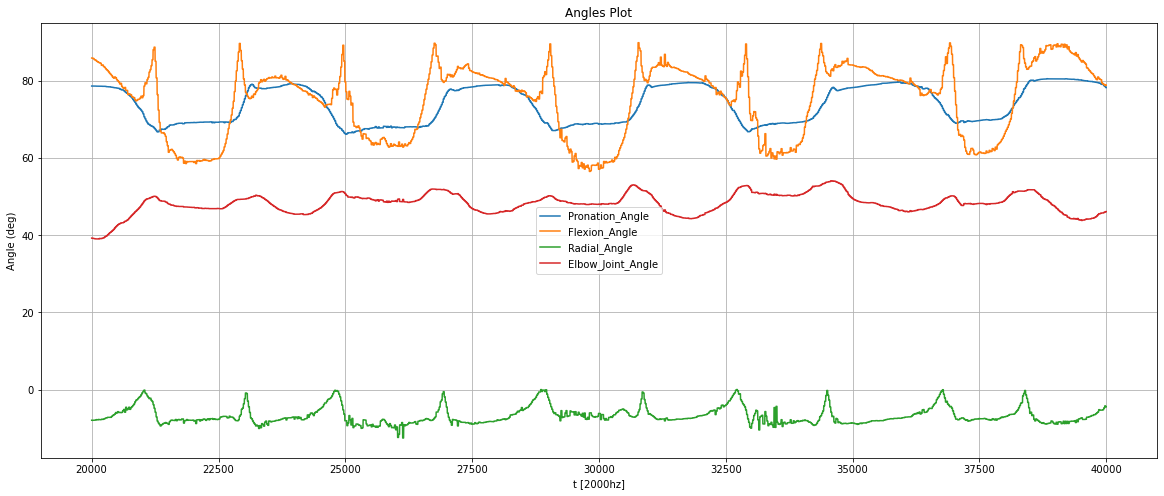

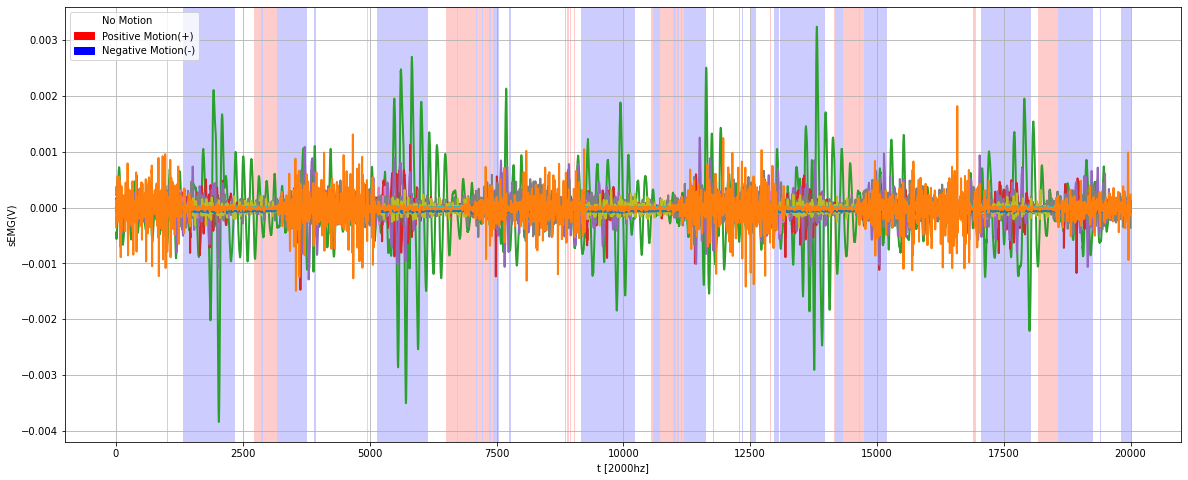

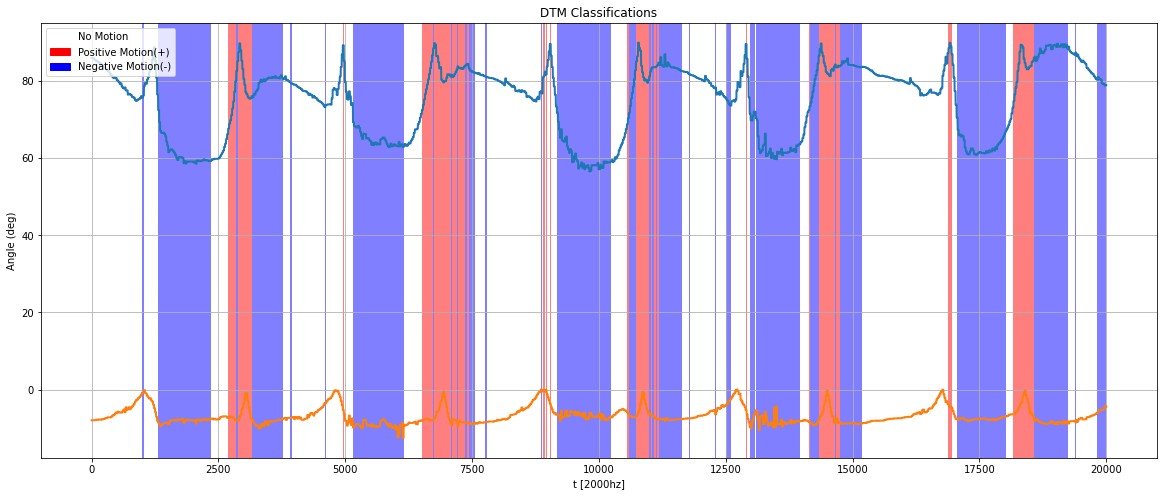

0 -> 44.84 %
1 -> 13.305 %
2 -> 41.855 %
Time elp- 98.59281826019287 s


In [76]:
compartive_label_plot(Hammer,1000,(20000,40000))